In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

In [2]:
%matplotlib inline

# 날짜, 시간 자료형, 도구

In [2]:
from datetime import datetime
now = datetime.now()
now
now.year, now.month, now.day

(2021, 10, 8)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [5]:
delta.days

926

In [7]:
delta.seconds

56700

In [23]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start

datetime.datetime(2011, 1, 7, 0, 0)

In [9]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [11]:
start - 2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

## 문자열을 datetime으로 변환하기

In [12]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [13]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [14]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [3]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [18]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [19]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [20]:
idx = pd.to_datetime(datestrs + [None])
idx
## NaT는 pandas에서 누락된 타임스탬프 데이터를 나타냄.

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

# 시계열 기초

In [4]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [24]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [25]:
ts.index.dtype

dtype('<M8[ns]')

## 색인, 선택, 부분선택

In [26]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [27]:
ts['20110110']

1.9657805725027142

In [28]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts.head()

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
Freq: D, dtype: float64

In [29]:
longer_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [30]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [31]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [32]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
dates

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [33]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


## 중복된 색인을 갖는 시계열

In [34]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [35]:
dup_ts.index.is_unique

False

In [36]:
dup_ts['1/3/2000']  # not duplicated

4

In [37]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [38]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [39]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 날짜 범위, 빈도, 이동

In [40]:
ts
resampler = ts.resample('D')
resampler

## 날짜 범위 생성하기

In [41]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [42]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [43]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [44]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [46]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize = True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 빈도와 날짜 오프셋

In [3]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [4]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [5]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [6]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [7]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

## 데이터 시프트
* 데이터를 시간 축에서 앞이나 뒤로 이동

In [11]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M')) ## 월 마지막 일
ts

2000-01-31   -0.577087
2000-02-29    0.124121
2000-03-31    0.302614
2000-04-30    0.523772
Freq: M, dtype: float64

In [12]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.577087
2000-04-30    0.124121
Freq: M, dtype: float64

In [13]:
ts.shift(-2)

2000-01-31    0.302614
2000-02-29    0.523772
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [14]:
ts / ts.shift(1) - 1
## 시계열에서의 퍼센트 변화를 계산할 때 사용

2000-01-31         NaN
2000-02-29   -1.215082
2000-03-31    1.438047
2000-04-30    0.730828
Freq: M, dtype: float64

In [15]:
ts.shift(2, freq='M')

2000-03-31   -0.577087
2000-04-30    0.124121
2000-05-31    0.302614
2000-06-30    0.523772
Freq: M, dtype: float64

In [16]:
ts.shift(3, freq='D')

2000-02-03   -0.577087
2000-03-03    0.124121
2000-04-03    0.302614
2000-05-03    0.523772
dtype: float64

In [17]:
ts.shift(1, freq='90T') ## T = 분

2000-01-31 01:30:00   -0.577087
2000-02-29 01:30:00    0.124121
2000-03-31 01:30:00    0.302614
2000-04-30 01:30:00    0.523772
Freq: M, dtype: float64

In [3]:
from pandas.tseries.offsets import Day, MonthEnd

In [24]:
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [26]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [27]:
offset = MonthEnd()

In [28]:
offset

<MonthEnd>

In [29]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [30]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [31]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    0.000940
2000-01-19    1.343810
2000-01-23   -0.713544
2000-01-27   -0.831154
2000-01-31   -2.370232
2000-02-04   -1.860761
2000-02-08   -0.860757
2000-02-12    0.560145
2000-02-16   -1.265934
2000-02-20    0.119827
2000-02-24   -1.063512
2000-02-28    0.332883
2000-03-03   -2.359419
2000-03-07   -0.199543
2000-03-11   -1.541996
2000-03-15   -0.970736
2000-03-19   -1.307030
2000-03-23    0.286350
2000-03-27    0.377984
2000-03-31   -0.753887
Freq: 4D, dtype: float64

In [33]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.514036
2000-02-29   -0.576873
2000-03-31   -0.808535
dtype: float64

In [34]:
ts.resample('M').mean()

2000-01-31   -0.514036
2000-02-29   -0.576873
2000-03-31   -0.808535
Freq: M, dtype: float64

# 시간대 다루기

In [5]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [36]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

## 시간대 지역화와 변환

In [37]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    0.331286
2012-03-10 09:30:00    1.349742
2012-03-11 09:30:00    0.069877
2012-03-12 09:30:00    0.246674
2012-03-13 09:30:00   -0.011862
2012-03-14 09:30:00    1.004812
Freq: D, dtype: float64

In [38]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [39]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.331286
2012-03-10 09:30:00+00:00    1.349742
2012-03-11 09:30:00+00:00    0.069877
2012-03-12 09:30:00+00:00    0.246674
2012-03-13 09:30:00+00:00   -0.011862
2012-03-14 09:30:00+00:00    1.004812
Freq: D, dtype: float64

In [40]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.331286
2012-03-10 04:30:00-05:00    1.349742
2012-03-11 05:30:00-04:00    0.069877
2012-03-12 05:30:00-04:00    0.246674
2012-03-13 05:30:00-04:00   -0.011862
2012-03-14 05:30:00-04:00    1.004812
Freq: D, dtype: float64

In [42]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.331286
2012-03-10 14:30:00+00:00    1.349742
2012-03-11 13:30:00+00:00    0.069877
2012-03-12 13:30:00+00:00    0.246674
2012-03-13 13:30:00+00:00   -0.011862
2012-03-14 13:30:00+00:00    1.004812
Freq: D, dtype: float64

In [43]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.331286
2012-03-10 15:30:00+01:00    1.349742
2012-03-11 14:30:00+01:00    0.069877
2012-03-12 14:30:00+01:00    0.246674
2012-03-13 14:30:00+01:00   -0.011862
2012-03-14 14:30:00+01:00    1.004812
Freq: D, dtype: float64

## 시간대를 고려해서 Timestamp 객체 다루기

In [44]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')

In [45]:
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [46]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [47]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [48]:
stamp_utc.value

1299902400000000000

In [49]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [50]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [51]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

## 다른 시간대 간의 연산
* 서로 다른 시간대를 갖은 두 시계열이 하나로 합쳐지면 UTC가 된다.
* 타임스탬프는 내부적으로 UTC로 저장되므로 추가적인 변환이 불필요한 명료한 연산이다.

In [52]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    1.327195
2012-03-08 09:30:00   -0.919262
2012-03-09 09:30:00   -1.549106
2012-03-12 09:30:00    0.022185
2012-03-13 09:30:00    0.758363
2012-03-14 09:30:00   -0.660524
2012-03-15 09:30:00    0.862580
2012-03-16 09:30:00   -0.010032
2012-03-19 09:30:00    0.050009
2012-03-20 09:30:00    0.670216
Freq: B, dtype: float64

In [53]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [54]:
result = ts1 + ts2

In [55]:
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00   -3.098213
2012-03-12 09:30:00+00:00    0.044369
2012-03-13 09:30:00+00:00    1.516726
2012-03-14 09:30:00+00:00   -1.321049
2012-03-15 09:30:00+00:00    1.725160
Freq: B, dtype: float64

In [56]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

# 기간과 기간 연산

In [5]:
p = pd.Period(2007, freq='A-DEC')
p ## period 개체는 2007년 1월 1일부터 같은 해 12월 31일까지의 기간 표현.

Period('2007', 'A-DEC')

In [6]:
p + 5

Period('2012', 'A-DEC')

In [7]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [8]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [9]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.204708
2000-02    0.478943
2000-03   -0.519439
2000-04   -0.555730
2000-05    1.965781
2000-06    1.393406
Freq: M, dtype: float64

In [10]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

## Period의 빈도 변환

In [11]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [12]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [13]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [14]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [15]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [16]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [17]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [18]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.092908
2007    0.281746
2008    0.769023
2009    1.246435
Freq: A-DEC, dtype: float64

In [19]:
ts.asfreq('M', how='start')

2006-01    0.092908
2007-01    0.281746
2008-01    0.769023
2009-01    1.246435
Freq: M, dtype: float64

In [20]:
ts.asfreq('B', how='end')

2006-12-29    0.092908
2007-12-31    0.281746
2008-12-31    0.769023
2009-12-31    1.246435
Freq: B, dtype: float64

## 분기 빈도

In [21]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [22]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [23]:
p.asfreq('D', 'end')


Period('2012-01-31', 'D')

In [25]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [29]:
(p.asfreq('B', 'e') - 1).asfreq('T', 's')+ 16 * 60

Period('2012-01-30 16:00', 'T')

In [30]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [31]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [32]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

## 타임스탬프와 기간 서로 변환하기

In [33]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    1.007189
2000-02-29   -1.296221
2000-03-31    0.274992
Freq: M, dtype: float64

In [34]:
pts = ts.to_period()
pts

2000-01    1.007189
2000-02   -1.296221
2000-03    0.274992
Freq: M, dtype: float64

In [35]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.228913
2000-01-30    1.352917
2000-01-31    0.886429
2000-02-01   -2.001637
2000-02-02   -0.371843
2000-02-03    1.669025
Freq: D, dtype: float64

In [36]:
ts2.to_period('M')

2000-01    0.228913
2000-01    1.352917
2000-01    0.886429
2000-02   -2.001637
2000-02   -0.371843
2000-02    1.669025
Freq: M, dtype: float64

In [37]:
pts = ts2.to_period()
pts

2000-01-29    0.228913
2000-01-30    1.352917
2000-01-31    0.886429
2000-02-01   -2.001637
2000-02-02   -0.371843
2000-02-03    1.669025
Freq: D, dtype: float64

In [38]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.228913
2000-01-30 23:59:59.999999999    1.352917
2000-01-31 23:59:59.999999999    0.886429
2000-02-01 23:59:59.999999999   -2.001637
2000-02-02 23:59:59.999999999   -0.371843
2000-02-03 23:59:59.999999999    1.669025
Freq: D, dtype: float64

## 배열로 PeriodIndex 생성하기

In [39]:
data = pd.read_csv('pydata-book-2nd-edition/examples/macrodata.csv')

In [40]:
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [41]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [42]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 리샘플링과 빈도 변환
* 리샘플링 : 시계열의 빈도를 변환
* 다운샘플링 : 상위빈도의 데이터를 하위빈도로 집계하는 것
* 업샘플링 : 하위빈도의 데이터를 상위빈도로 집계하는 것

In [43]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -0.438570
2000-01-02   -0.539741
2000-01-03    0.476985
2000-01-04    3.248944
2000-01-05   -1.021228
                ...   
2000-04-05   -1.022487
2000-04-06   -0.402827
2000-04-07    0.220487
2000-04-08   -0.193401
2000-04-09    0.669158
Freq: D, Length: 100, dtype: float64

In [44]:
ts.resample('M').mean()

2000-01-31   -0.299862
2000-02-29   -0.105373
2000-03-31    0.273377
2000-04-30   -0.160012
Freq: M, dtype: float64

## 다운샘플링

In [45]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [46]:
ts.resample('5min', closed='right').sum()
## 5분 단위로 묶어서 그룹의 합 집계.

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

## 업샘플링과 보간

In [6]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.092908,0.281746,0.769023,1.246435
2000-01-12,1.007189,-1.296221,0.274992,0.228913


In [8]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.092908,0.281746,0.769023,1.246435
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.007189,-1.296221,0.274992,0.228913


In [10]:
frame.resample('D').ffill(limit =3)


,Colorado,Texas,New York,Ohio
2000-01-05,0.092908,0.281746,0.769023,1.246435
2000-01-06,0.092908,0.281746,0.769023,1.246435
2000-01-07,0.092908,0.281746,0.769023,1.246435
2000-01-08,0.092908,0.281746,0.769023,1.246435
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.007189,-1.296221,0.274992,0.228913


In [11]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,1.352917,0.886429,-2.001637,-0.371843
2000-02,1.669025,-0.438570,-0.539741,0.476985
2000-03,3.248944,-1.021228,-0.577087,0.124121
2000-04,0.302614,0.523772,0.000940,1.343810
2000-05,-0.713544,-0.831154,-2.370232,-1.860761


In [12]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.410592,-0.253788,-0.898937,0.190471
2001,0.054495,0.301161,-0.116850,0.117691


# 이동창 함수

In [13]:
close_px_all = pd.read_csv('pydata-book-2nd-edition/examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [14]:
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [15]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

In [17]:
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


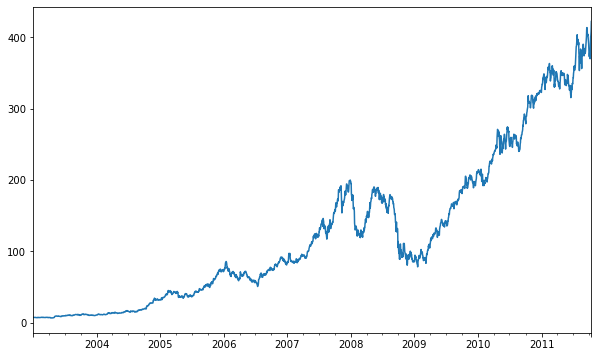

In [18]:
close_px.AAPL.plot()

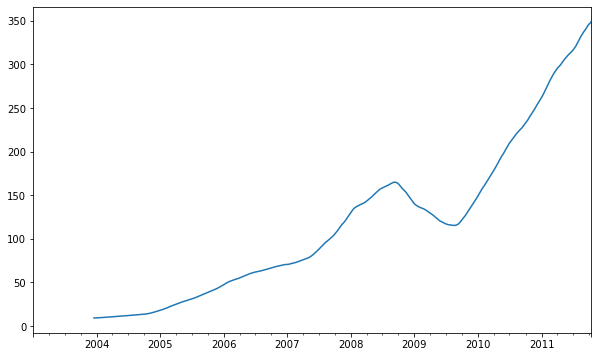

In [19]:
close_px.AAPL.rolling(250).mean().plot()

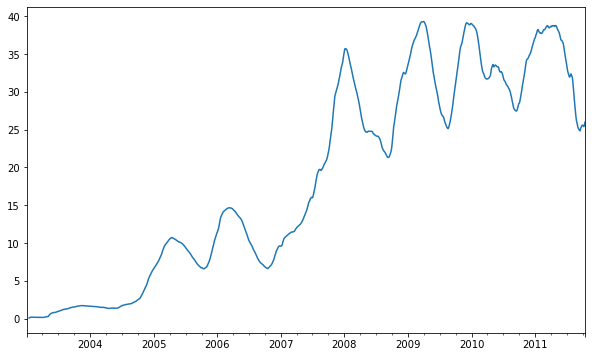

In [21]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()

In [27]:
expanding_mean = appl_std250.expanding().mean()

In [28]:
expanding_mean

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    18.521201
2011-10-11    18.524272
2011-10-12    18.527385
2011-10-13    18.530554
2011-10-14    18.533823
Freq: B, Name: AAPL, Length: 2292, dtype: float64

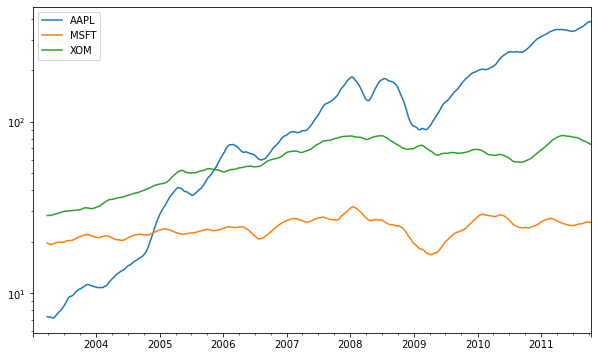

In [29]:
close_px.rolling(60).mean().plot(logy=True)


## 지수 가중 함수

In [31]:
aapl_px = close_px.AAPL['2006':'2007']
aapl_px.head()

2006-01-02    71.89
2006-01-03    74.75
2006-01-04    74.97
2006-01-05    74.38
2006-01-06    76.30
Freq: B, Name: AAPL, dtype: float64

In [32]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()

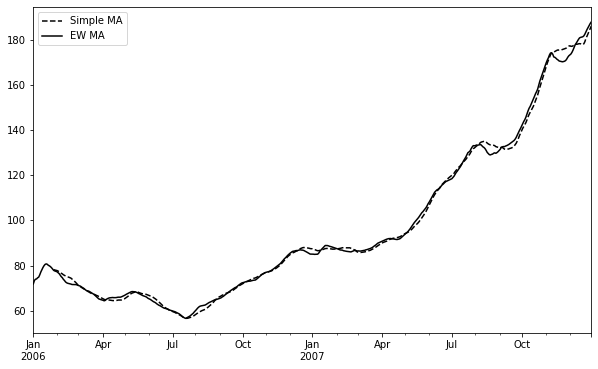

In [33]:
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

## 이진이동창 함수

In [34]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

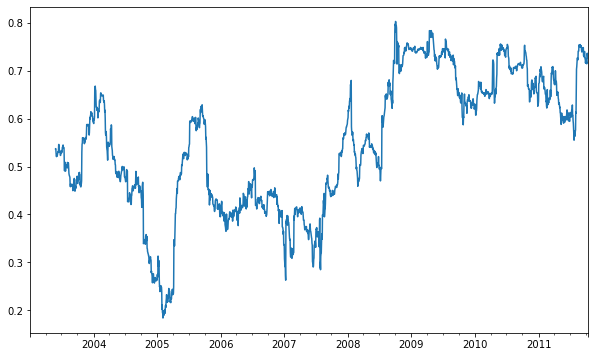

In [35]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()